In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("NY-House-Dataset.csv")

In [4]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [13]:
df.shape

(4801, 17)

In [14]:
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## **Wstępna analiza**

In [16]:
df_learning = X_train.join(y_train)

In [17]:
df_learning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840 entries, 4044 to 562
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  3840 non-null   object 
 1   TYPE                         3840 non-null   object 
 2   BEDS                         3840 non-null   int64  
 3   BATH                         3840 non-null   float64
 4   PROPERTYSQFT                 3840 non-null   float64
 5   ADDRESS                      3840 non-null   object 
 6   STATE                        3840 non-null   object 
 7   MAIN_ADDRESS                 3840 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  3840 non-null   object 
 9   LOCALITY                     3840 non-null   object 
 10  SUBLOCALITY                  3840 non-null   object 
 11  STREET_NAME                  3840 non-null   object 
 12  LONG_NAME                    3840 non-null   object 
 13  FORMATTED_ADDRES

In [21]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,3840.00000,3840.000000,3840.000000,3840.000000,3840.000000,3.840000e+03
mean,3.40026,2.406992,2220.404765,40.714660,-73.940961,2.507240e+06
std,2.71508,2.051937,2564.804364,0.087198,0.099983,3.500421e+07
min,1.00000,0.000000,230.000000,40.499546,-74.253033,2.494000e+03
25%,2.00000,1.000000,1213.000000,40.640141,-73.987030,4.990000e+05
50%,3.00000,2.000000,2184.207862,40.726171,-73.949100,8.365000e+05
75%,4.00000,3.000000,2184.207862,40.772102,-73.871229,1.500000e+06
max,50.00000,50.000000,65535.000000,40.912729,-73.703904,2.147484e+09


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

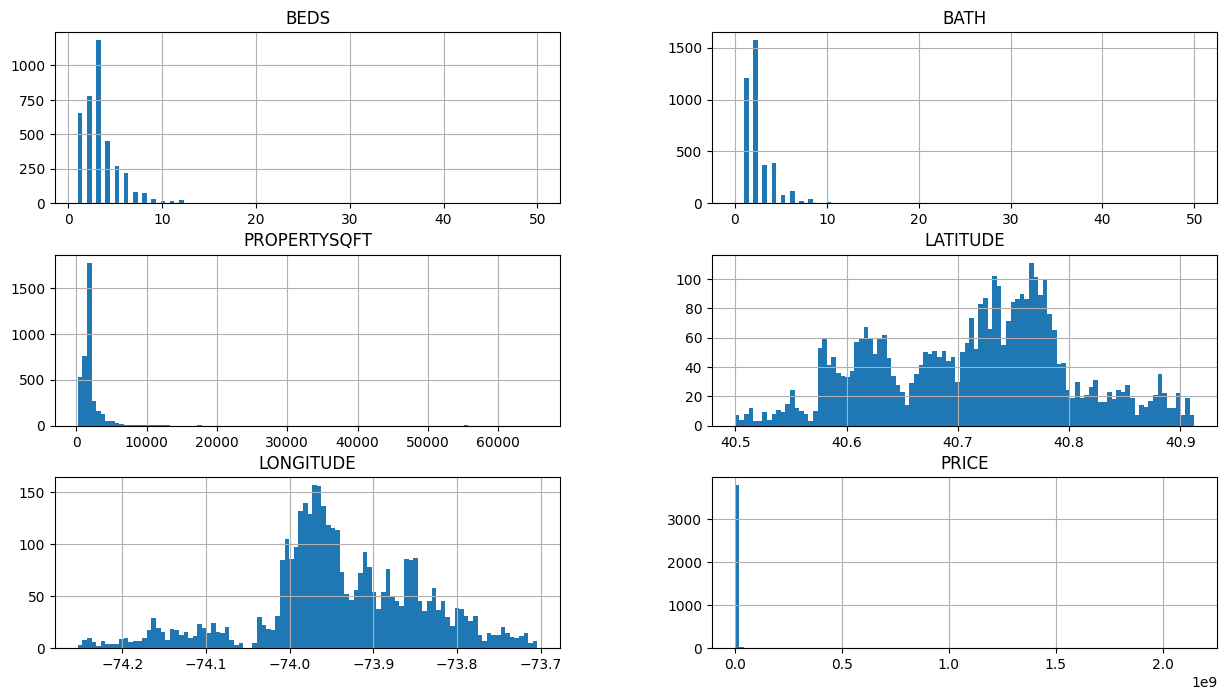

In [25]:
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

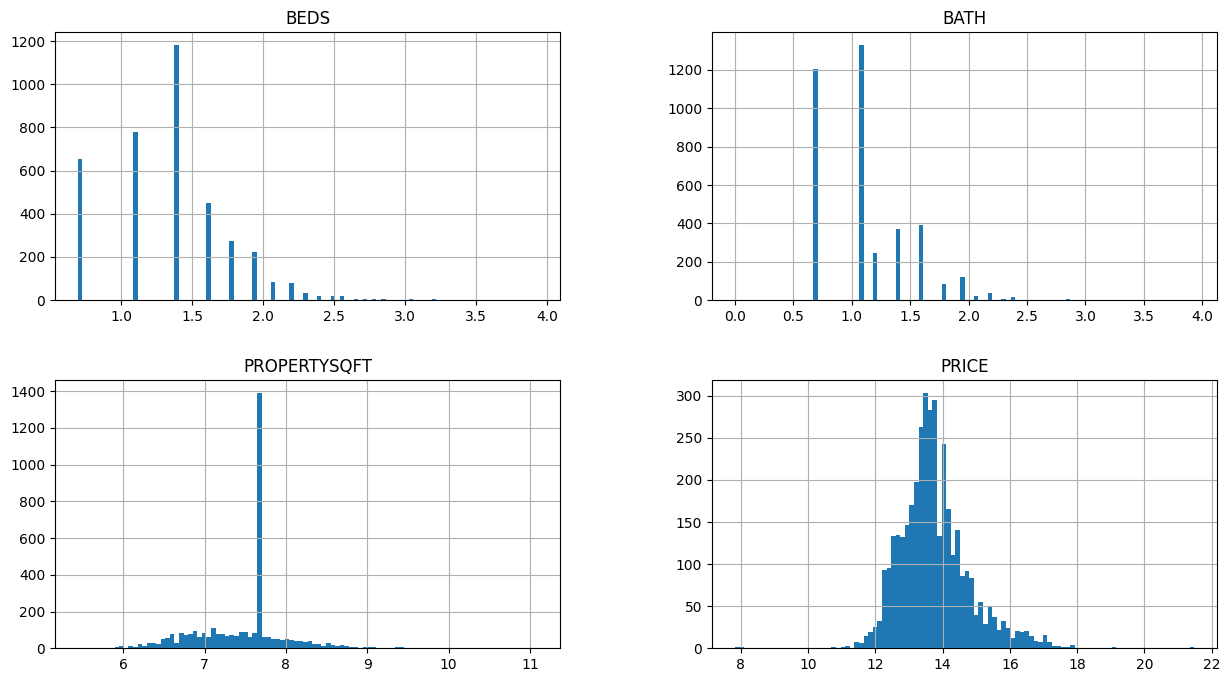

In [29]:
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

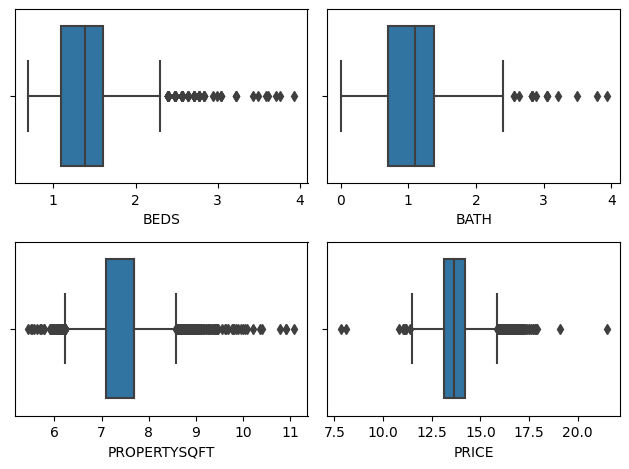

In [31]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

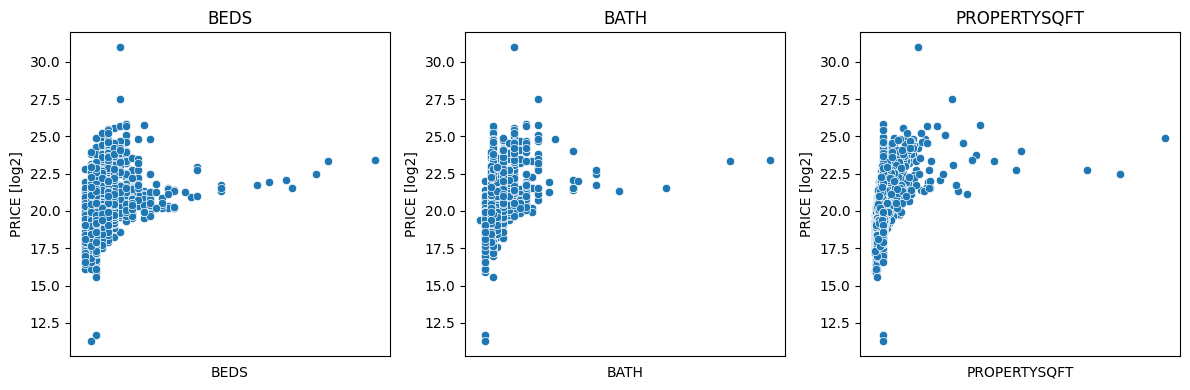

In [32]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log2(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_xticks([])
    axes[i].set_ylabel("PRICE [log2]")

plt.tight_layout()
plt.show()

<AxesSubplot: >

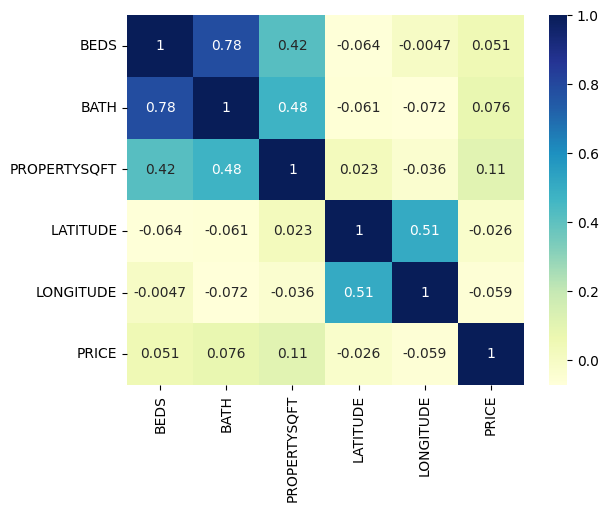

In [35]:
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

In [50]:
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME"]

for col in cols:
    print(df_learning[col].value_counts(), end="\n________________________________________________________________\n")

Brokered by COMPASS                                 369
Brokered by Douglas Elliman - 575 Madison Ave        87
Brokered by Corcoran East Side                       81
Brokered by Brown Harris Stevens                     68
Brokered by RE MAX Edge                              64
                                                   ... 
Brokered by Rubirosa International Realty             1
Brokered by Keller Williams Realty West Monmouth      1
Brokered by Fine Choice Realty Inc                    1
Brokered by Claire Properties                         1
Brokered by Anthony Napolitano Homes                  1
Name: BROKERTITLE, Length: 931, dtype: int64
________________________________________________________________--
Co-op for sale                1139
House for sale                 796
Condo for sale                 732
Multi-family home for sale     598
Townhouse for sale             238
Pending                        196
Contingent                      70
Land for sale              